In Chapter 4.6 we considered the demand for edible chicken, which the U.S. Department of Agriculture calls ‘‘broilers.’’ The data for this exercise are in the file $newbroiler.dat$.

a.  Using the 52 annual observations, 1950–2001, estimate the reciprocal model $Q = \alpha_1 + \alpha_2 (1/P) + e$. Plot the fitted value of $Q=$ per capita consumption of chicken, in pounds, versus $P =$ real price of chicken. How well does the estimated relation fit the data?






      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(1, 50)        =    356.60
       Model |  6425.60536         1  6425.60536   Prob > F        =    0.0000
    Residual |  900.957921        50  18.0191584   R-squared       =    0.8770
-------------+----------------------------------   Adj R-squared   =    0.8746
       Total |  7326.56328        51  143.658104   Root MSE        =    4.2449

------------------------------------------------------------------------------
           q |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         P_r |   48.36496   2.561186    18.88   0.000     43.22066    53.50925
       _cons |  -6.024364   2.059201    -2.93   0.005    -10.16039   -1.888337
------------------------------------------------------------------------------

(option xb assumed; fitted values)


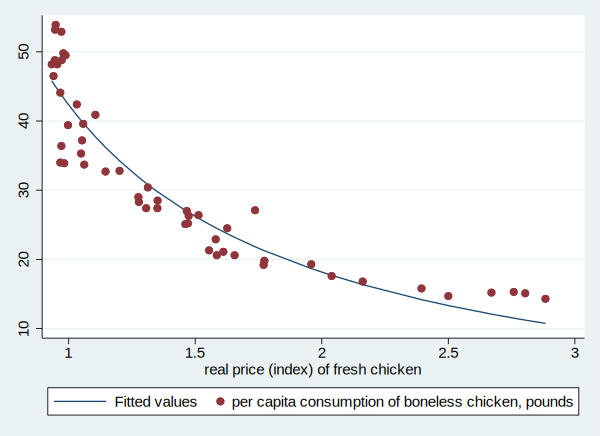

In [1]:
clear all

use https://www.stata.com/data/s4poe4/newbroiler.dta

gen P_r = 1/p

regress q P_r 

predict q_hat

twoway line q_hat p, sort || scatter q p

// Or graph the function implied by the model
// twoway function y = _b[_cons] +_b[mpg]*x + _b[mpg2]*x^2, range(10 40)

This is very good, with $R^2 = 0.87 $

b. Using the estimated relation in part (a), compute the elasticity of per capita consumption with respect to real price when the real price is its median, $\$1.31$, and quantity is taken to be the corresponding value on the fitted curve. [Hint: The derivative (slope) of reciprocal model $y = a+b(1/x)$ is $\frac{dy}{dx} = -b(1/x^2)$. Compare this estimated elasticity to the estimate found in Chapter 4.6 where the log-log functional form was used.
$$Q(P) = \alpha_1 + \alpha_2 (1/P) + e \Rightarrow \frac{dQ(P)}{dP} = -\frac{\alpha_2}{P^2}$$ $$\varepsilon = \frac{dQ}{dP} \times \frac{P}{Q} = -\frac{\alpha_2}{P^2}\times \frac{P}{Q} = -\frac{\alpha_2}{PQ} = \frac{-\alpha_2}{P\alpha_1 + \alpha_2}$$

$$\varepsilon (1.31) = \frac{-48.36496}{48.36496 -6.024364 \times 1.31}=-1.19499193 $$



From chapter 4.6, the price elasticity obtained in the log-log model is $1.121$. In our model, we obtain a slightly greater elasticity, at $1.195$


c. Estimate the poultry demand using the linear-log functional form $Q = \gamma_1 + \gamma_2 \ln (P) + e$. Plot the fitted values of $Q=$ per capita consumption of chicken, in pounds, versus $P=$ real price of chicken. How well does the estimated relation fit the data?





      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(1, 50)        =    218.55
       Model |  5962.45201         1  5962.45201   Prob > F        =    0.0000
    Residual |  1364.11127        50  27.2822254   R-squared       =    0.8138
-------------+----------------------------------   Adj R-squared   =    0.8101
       Total |  7326.56328        51  143.658104   Root MSE        =    5.2232

------------------------------------------------------------------------------
           q |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       log_p |   -31.9078   2.158362   -14.78   0.000      -36.243    -27.5726
       _cons |   41.21114   .9898122    41.64   0.000     39.22304    43.19923
------------------------------------------------------------------------------

(option xb assumed; fitted values)


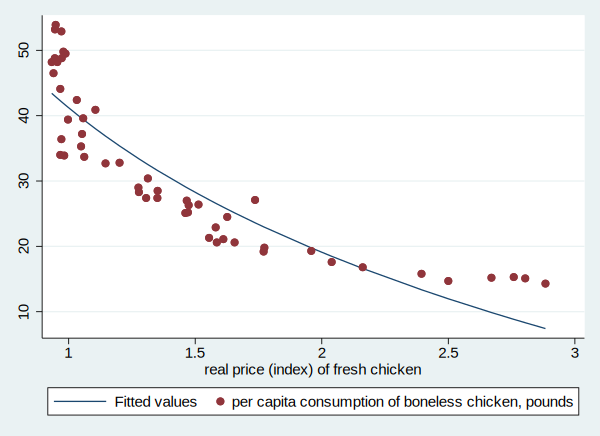

In [2]:
gen log_p = log(p)

reg q log_p

predict q2_hat

twoway line q2_hat p, sort || scatter q p



It fits the data pretty well, with a $R^2 = 0.81$. It wasn't as good as the previous one, though.


d. Using the estimated relation in part (c), compute the elasticity of per capita consumption with respect to real price when the real price is its median, $\$1.31$. Compare this estimated elasticity to the estimate from the log-log model and from the reciprocal model in part (b).

$$ Q(P) = \gamma_1 + \gamma_2 \ln(P) + e \Rightarrow \frac{dQ}{dP} = \frac{\gamma_2}{P}$$
$$ \varepsilon = \frac{dQ}{dP} \times \frac{P}{Q} = \frac{\gamma_2}{P} \times \frac{P}{\gamma_1 + \gamma_2 \ln(P)} = \frac{\gamma_2}{\gamma_1 + \gamma_2 \ln(P)}$$
$$ \varepsilon(1.31) = \frac{-31.9078}{41.21114-31.9078 \times \ln(1.31)} = -0.978911963 $$
This is (much?) less elastic than the previous ones. 


e. Evaluate the suitability of the log-log, linear-log, and reciprocal models for fitting the poultry consumption data. Which of them would you select as best, and why?


In [3]:
gen log_q = log(q)

// reciprocal
reg q P_r

// linear log
reg q log_p

// log log
reg log_q log_p

predict q3_hat

gen q3_hat_exp = exp(q3_hat)




      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(1, 50)        =    356.60
       Model |  6425.60536         1  6425.60536   Prob > F        =    0.0000
    Residual |  900.957921        50  18.0191584   R-squared       =    0.8770
-------------+----------------------------------   Adj R-squared   =    0.8746
       Total |  7326.56328        51  143.658104   Root MSE        =    4.2449

------------------------------------------------------------------------------
           q |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         P_r |   48.36496   2.561186    18.88   0.000     43.22066    53.50925
       _cons |  -6.024364   2.059201    -2.93   0.005    -10.16039   -1.888337
------------------------------------------------------------------------------


      Source |       SS           df       MS 

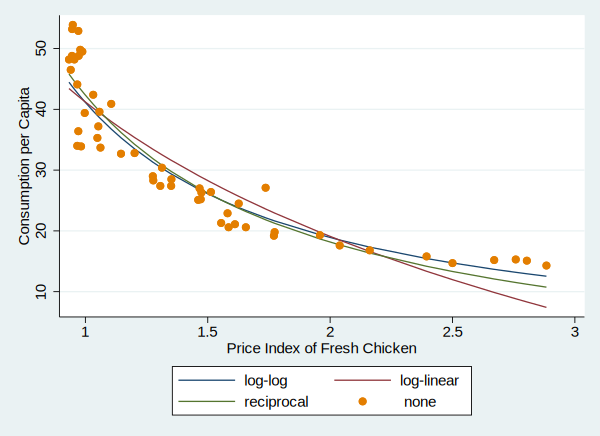

In [4]:
twoway line q3_hat_exp p, sort || line q2_hat p, sort || line q_hat p, sort || scatter q p, legend(label(1 "log-log") label(2 "log-linear") label(3 "reciprocal") label(4 none)) xtitle("Price Index of Fresh Chicken") ytitle("Consumption per Capita")